In [564]:
import numpy as np 
import matplotlib.pyplot as plt 

In [565]:
nd = 8

In [566]:
a = [] 
for l in open("test.txt","r").readlines()[1::2]: 
    a.append([float(x) for x in l.split(",")[:-1]])
arr = np.array(a); print(arr.shape)

(11840, 33)


In [567]:
b = [] 
for l in open("test.txt","r").readlines()[0::2]: 
    b.append([float(x) for x in l.split(",")[:-1]])
arr2 = np.array(b); print(arr2.shape)

(11840, 18)


In [568]:
arr[0]

array([ 0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     , -0.05175,
       -0.04025, -0.00575, -0.04025, -0.05175,  0.00575, -0.00575,
        0.00575,  0.04025, -0.04025,  0.04025,  0.00575, -0.00575,
        0.05175,  0.04025,  0.05175])

In [536]:
len(xi)

8

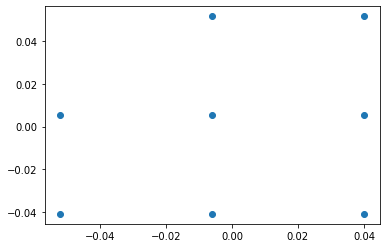

In [543]:
xi = arr[1][-2*nd::2]; yi = arr[1][-2*nd+1::2];
plt.scatter(xi,yi)

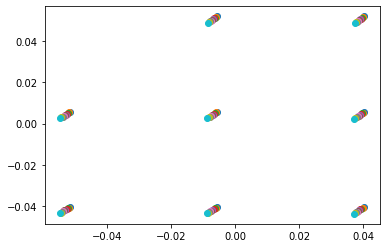

In [544]:
for i in range(0,len(arr)):
    xi = arr[i][-2*nd::2]; yi = arr[i][-2*nd+1::2];
    plt.scatter(xi,yi)

In [484]:
len(arr[0])

33

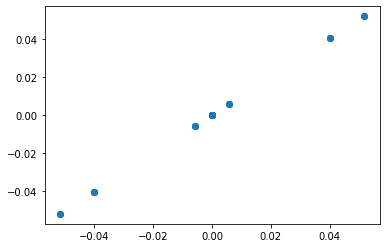

In [519]:
xi = arr[:1][-2*nd::2]; yi = arr[:1][-2*nd+1::2];
plt.scatter(xi,yi)

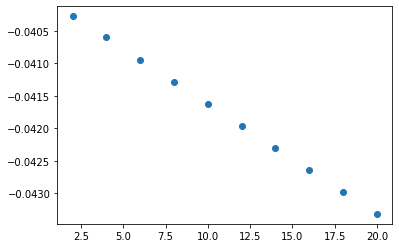

In [545]:
plt.scatter(arr[:,0],arr[:,-2*nd+1])  # real movement

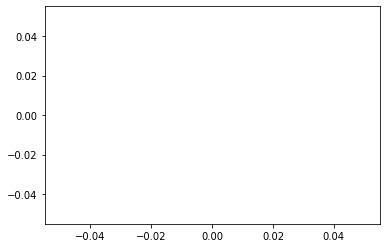

In [527]:
indexer = arr[:,-2*nd+1] > 0.0241
plt.scatter(arr[:,0][indexer],arr[:,2*nd+1][indexer])  # only upper part close to max

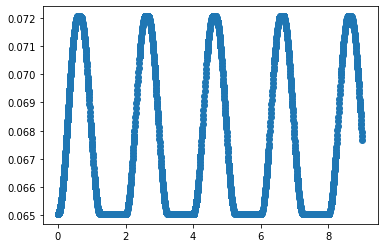

In [490]:
plt.scatter(arr[:,0],arr2[:,1])  # l0 (actuation function)

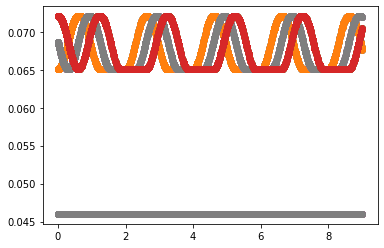

In [491]:
[plt.scatter(arr[:,0],arr2[:,i]) for i in range(len(arr2[0]))]

In [493]:
max(arr[:,0])

9.00249

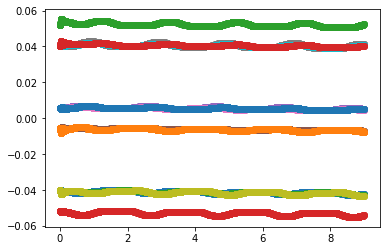

In [528]:
[plt.scatter(arr[:,0],arr[:,i]) for i in range(2*nd+2,4*nd)]

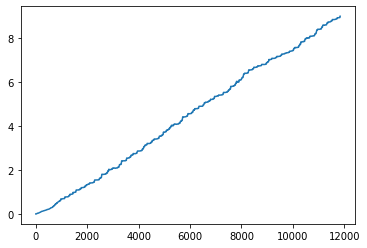

In [529]:
plt.plot(arr[:,0])

In [589]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colorbar import ColorbarBase
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [590]:
a = [] 
for l in open("test3.txt","r").readlines(): 
    a.append([float(x) for x in l.split(",")[:-1]])
arr = np.array(a); print(arr.shape)

(400, 6)


In [591]:
arr

array([[ 0.00000e+00,  0.00000e+00,  0.00000e+00,  8.88314e-06,
        -8.88314e-06,  2.84095e-02],
       [ 0.00000e+00,  1.00000e-01,  0.00000e+00, -1.18960e-05,
         1.18960e-05,  2.85098e-02],
       [ 0.00000e+00,  2.00000e-01,  0.00000e+00, -2.66101e-05,
         2.66101e-05,  2.85125e-02],
       ...,
       [ 1.90000e+00,  1.70000e+00,  0.00000e+00, -1.76406e-04,
         2.13137e-04,  7.31599e-02],
       [ 1.90000e+00,  1.80000e+00,  0.00000e+00, -2.71899e-04,
         3.04420e-04,  7.69332e-02],
       [ 1.90000e+00,  1.90000e+00,  0.00000e+00,  2.53471e-06,
        -2.06298e-05,  2.76588e-02]])

In [592]:
def phase_heatmap(df, colname, ax, title, size=110, minv=None, maxv=None, phase1="phase 0", phase2="phase 1"):
    if minv == None and maxv == None: 
        minv = df[colname].min(); maxv = df[colname].max()
    ax.set(xlim=(0,2),ylim=(0,2),title=title); ax.set_aspect(1)
    ax.scatter(df[phase1], df[phase2], cmap=mpl.colormaps["plasma"],marker="s",
        c=mpl.colors.Normalize(minv,maxv)(df[colname]),s=size)
    divider = make_axes_locatable(ax); cax = divider.append_axes("right", size="5%", pad=0.05)
    ColorbarBase(cax,cmap=mpl.colormaps["plasma"],norm=mpl.colors.Normalize(minv,maxv))

In [596]:
df = pd.DataFrame(arr,columns=["phase 0","phase 1","phase 2","d_comx","d_comy","d_theta"])

In [597]:
df

,phase 0,phase 1,phase 2,d_comx,d_comy,d_theta
0,0.0,0.0,0.0,0.000009,-0.000009,0.028410
1,0.0,0.1,0.0,-0.000012,0.000012,0.028510
2,0.0,0.2,0.0,-0.000027,0.000027,0.028512
3,0.0,0.3,0.0,-0.000028,0.000028,0.028650
4,0.0,0.4,0.0,-0.000026,0.000026,0.028811
...,...,...,...,...,...,...
395,1.9,1.5,0.0,0.000054,-0.000081,0.027228
396,1.9,1.6,0.0,-0.000221,0.000256,0.086112
397,1.9,1.7,0.0,-0.000176,0.000213,0.073160
398,1.9,1.8,0.0,-0.000272,0.000304,0.076933


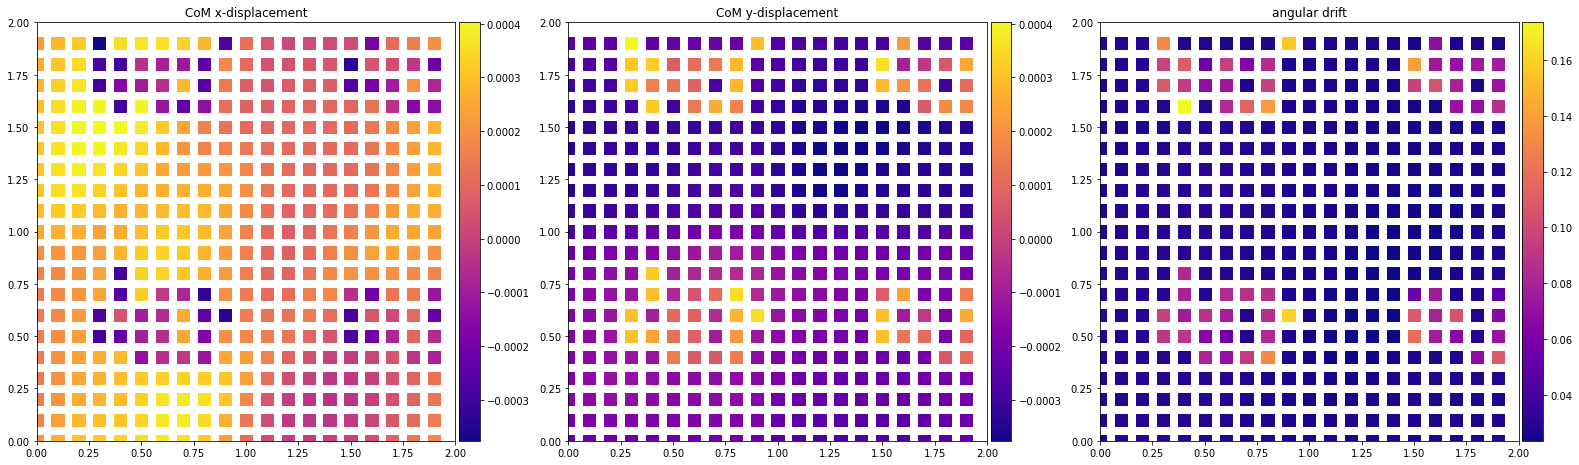

In [600]:
fig, ax = plt.subplots(1,3,figsize=(27,9)); coms = df[["d_comx","d_comy"]].to_numpy()
mi = coms.min(); ma = coms.max()
phase_heatmap(df,"d_comx",ax[0],"CoM x-displacement",size=150,minv=mi,maxv=ma)
phase_heatmap(df,"d_comy",ax[1],"CoM y-displacement",size=150,minv=mi,maxv=ma)
phase_heatmap(df,"d_theta",ax[2],"angular drift",size=150)